
# Project 1 : Determining Probabilities of Handwriting Formations using PGMs
## UBIT Name : mgosi
## Person No   : 50290934
## Name : Mahesh Gosi

In [30]:
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
from IPython.display import display
from pgmpy.inference import BeliefPropagation

# Part 1 : Evaluate Correlations and Independencies
We determine how the variables are related to eachother. This is tested by comparing the Joint Probability with the product of the probabilities of the corresponding variables.
## Retrieving the Probabilities into a Dataframe

In [31]:
CondProbDist = {}
CondProbDist
for i in range(6):
    CondProbDist[i] = pd.read_csv('Table'+str(i+3)+'.csv')
    CondProbDist[i].replace(regex = True, inplace = True, to_replace = r'% *\(*[0-9]*\)*', value = r'')
MargProb = pd.read_csv('Table2.csv')
MargProb.replace(regex = True, inplace = True, to_replace = r'% *\(*[0-9]*\)*', value = r'')


In [32]:
for i in range(6):
    print('='*76)
    print ('CPD '+str(i+1))
    print('='*76)
    display(CondProbDist[i])
    print('-'*76)

CPD 1


,x1,x01 (t shorter than h),x11 (t even with h),x21 (t taller than h),x31 (No set pattern)
0,Total,78,1.5,5.5,15
1,x02 (retraced staff),23.1,66.6,45.5,40
2,x12 (curved right),36.5,0,9.1,20
3,x22 (curved left),2.6,0,0,3.3
4,x32 (both curved),17.3,0,18.2,16.7
5,x42 (no pattern),20.5,33.3,27.3,20
6,x04 (upper staff),73.7,100,72.7,56.7
7,x14 (lower staff),7.7,0,27.3,20
8,x24 (above staff),1.3,0,0,0
9,x34 (no pattern),17.3,0,0,23.3


----------------------------------------------------------------------------
CPD 2


,x2,x02 (retraced staff),x12 (curved right),x22 (curved left),x32 (both curved),x42 (no pattern)
0,Total,27.5,32,2.5,17,21
1,x03 (rounded arch),12.7,26.6,20,17.6,11.9
2,x13 (pointed arch),74.5,65.6,80,70.6,50
3,x23 (no pattern),12.7,7.8,0,11.8,38.1
4,x05 (upward),41.8,34.4,60,38.2,33.4
5,x15 (downward),7.3,10.9,40,14.7,9.5
6,x25 (even),10.9,12.5,0,11.8,7.1
7,x35 (no pattern),40,42.2,0,35.3,50


----------------------------------------------------------------------------
CPD 3


,x3,x03 (rounded arch),x13 (pointed arch),x23 (no pattern)
0,Total,18,66,16
1,x02 (retraced staff),19.4,31.1,21.9
2,x12 (curved right),47.2,31.8,15.6
3,x22 (curved left),2.8,3.03,0
4,x32 (both curved),16.7,18.2,12.5
5,x42 (no pattern),13.9,15.9,50
6,x05 (upward),36.1,39.4,31.3
7,x15 (downward),8.3,11.4,12.5
8,x25 (even),22.2,9.1,3.1
9,x35 (no pattern),33.3,40.2,53.1


----------------------------------------------------------------------------
CPD 4


,x4,x04 (upper staff),x14 (lower staff),x24 (above staff),x34 (no pattern)
0,Total,71.5,10.5,1,17
1,x01 (t shorter than h),80.4,57.1,100,79.4
2,x11 (t even with h),2.1,0,0,0
3,x21 (t taller than h),5.6,14.3,0,0
4,x31 (no set pattern),11.9,28.6,0,20.6
5,x02 (retraced staff),30.8,23.8,0,17.6
6,x12 (curved right),32.2,28.6,100,32.3
7,x22 (curved left),2.8,0,0,2.9
8,x32 (both curved),15.4,19,0,23.5
9,x42 (no pattern),19.6,28.6,0,23.5


----------------------------------------------------------------------------
CPD 5


,x5,x05 (upward),x15 (downward),x25 (even),x35 (no pattern)
0,Total,37.5,11,10.5,41
1,x02 (retraced staff),30.7,18.2,28.6,26.8
2,x12 (curved right),29.3,31.8,38.1,32.9
3,x22 (curved left),4,9.1,0,0
4,x32 (both curved),17.3,22.7,19,14.6
5,x42 (no pattern),18.2,18.2,14.3,25.6
6,x03 (rounded arch),17.3,13.6,38.1,14.6
7,x13 (pointed arch),69.3,68.2,57.1,64.6
8,x23 (no pattern),13.3,18.2,4.8,20.7


----------------------------------------------------------------------------
CPD 6


,x6,x06 (tented),x16 (single stroke),x26 (looped),x36 (closed),x46 (mixed)
0,Total,1.5,32,14,31.5,21
1,x01 (t shorter than h),100,68.7,71.4,87.3,80.9
2,x11 (t even with h),0,3.1,3.6,0,0
3,x21 (t taller than h),0,9.4,3.6,3.2,4.8
4,x31 (no set pattern),0,18.7,21.4,9.5,14.3
5,x02 (retraced staff),0,28.1,21.4,31.7,26.2
6,x12 (curved right),33.3,29.6,39.2,31.7,30.9
7,x22 (curved left),0,0,0,7.9,0
8,x32 (both curved),66.6,23.4,14.2,9.5,16.7
9,x42 (no pattern),0,18.7,25,19,26.2


----------------------------------------------------------------------------


In [33]:
x_len = [0,4,5,3,4,4,5]
MargProb


,Values,x1 (Relative height to t to h),x2 (Shape of h loop),x3 (Shape of h arch),x4 (Height of Cross ),x5 (Baseline of h),x6 (Shape of t)
0,a = x0,78,27.5,18,71.5,37.5,1.5
1,b = x1,1.5,32,66,10.5,11,32
2,c = x2,5.5,2.5,16,1,10.5,14
3,d = x3,15,17,NaN,17,41,31.5
4,e = x4,NaN,21,NaN,NaN,NaN,21


### Here we define a function to calculate the product of probabilites of corresponding variables using the Marginal Probabilities of the Variables.

In [34]:
def MulMargProb(x, y):
    x_val = MargProb.iloc[:,x].values
    y_val = MargProb.iloc[:,y].values
    prodXY = []
    for i in range(len(x_val)):
        pXY = []
        for j in range(len(y_val)):
            pXY.append(float(x_val[i])*float(y_val[j]))
        prodXY.append(pXY)
    return prodXY

### Joint Probability of the Variables are calculated using the CPD Tables provided.

In [35]:
def jointProb(p, c):
    jP = []
    for i in range(len(c)):
        tempJp = []
        for j in range(p.shape[0]):
            tempJp.append(float(p[j][i]) * float(c[i]))
        jP.append(tempJp)
    jP = np.asarray(jP)
    return jP
        #print(np.asarray(jp).T)

### Comparing both by subtracting

In [36]:
def check_independence():
    ind_dic = {}
    ind_dic['12'] = abs(jointProb(p12,c1) - m12).sum()/10000
    ind_dic['14'] = abs(jointProb(p14,c1) - m14).sum()/10000
    ind_dic['16'] = abs(jointProb(p16,c1) - m16).sum()/10000
    
    ind_dic['23'] = abs(jointProb(p23,c2) - m23).sum()/10000
    ind_dic['25'] = abs(jointProb(p25,c2) - m25).sum()/10000
    
    ind_dic['32'] = abs(jointProb(p32,c3) - m32).sum()/10000
    ind_dic['35'] = abs(jointProb(p35,c3) - m35).sum()/10000
    ind_dic['36'] = abs(jointProb(p36,c3) - m36).sum()/10000
    
    ind_dic['41'] = abs(jointProb(p41,c4) - m41).sum()/10000
    ind_dic['42'] = abs(jointProb(p42,c4) - m42).sum()/10000
    ind_dic['46'] = abs(jointProb(p46,c4) - m46).sum()/10000
    
    ind_dic['52'] = abs(jointProb(p52,c5) - m52).sum()/10000
    ind_dic['53'] = abs(jointProb(p53,c5) - m53).sum()/10000

    ind_dic['61'] = abs(jointProb(p61,c6) - m61).sum()/10000
    ind_dic['62'] = abs(jointProb(p62,c6) - m62).sum()/10000
    ind_dic['63'] = abs(jointProb(p63,c6) - m63).sum()/10000
    ind_dic['64'] = abs(jointProb(p64,c6) - m64).sum()/10000
    
    return (ind_dic)


In [37]:
probDist = CondProbDist[0]
p12 = probDist.iloc[1:6,1:].values
c1 = probDist.iloc[0,1:].values
p14 = probDist.iloc[6:10,1:].values
p16 = probDist.iloc[10:,1:].values

m12 = MulMargProb(1,2)[:4]
m14 = np.asarray(MulMargProb(1,4)[:4]).T[:4].T.tolist()
m16 = MulMargProb(1,6)[:4]



In [38]:
probDist = CondProbDist[1]
#display(probDist)
c2 = probDist.iloc[0,1:].values
p23 = probDist.iloc[1:4,1:].values
p25 = probDist.iloc[4:,1:].values

m23 = np.asarray(MulMargProb(2,3)).T[:3].T.tolist()
m25 = np.asarray(MulMargProb(2,5)).T[:4].T.tolist()


In [39]:
probDist = CondProbDist[2]
#display(probDist)
c3 = probDist.iloc[0,1:].values
p32 = probDist.iloc[1:6,1:].values
p35 = probDist.iloc[6:10,1:].values
p36 = probDist.iloc[10:,1:].values

m32 = MulMargProb(3,2)[:3]
m35 = np.asarray(MulMargProb(3,5)[:3]).T[:4].T.tolist()
m36 = MulMargProb(3,6)[:3]



In [40]:
probDist = CondProbDist[3]
#display(probDist)
c4 = probDist.iloc[0,1:].values
p41 = probDist.iloc[1:5,1:].values
p42 = probDist.iloc[5:10,1:].values
p46 = probDist.iloc[10:,1:].values

m41 = np.asarray(MulMargProb(4,1)[:4]).T[:4].T.tolist()
m42 = MulMargProb(4,2)[:4]
m46 = MulMargProb(4,6)[:4]


In [41]:
probDist = CondProbDist[4]
#display(probDist)
c5 = probDist.iloc[0,1:].values
p52 = probDist.iloc[1:6,1:].values
p53 = probDist.iloc[6:,1:].values

m52 = MulMargProb(5,2)[:4]
m53 = np.asarray(MulMargProb(5,3)[:4]).T[:3].T.tolist()


In [42]:
probDist = CondProbDist[5]
#display(probDist)
c6 = probDist.iloc[0,1:].values
p61 = probDist.iloc[1:5,1:].values
p62 = probDist.iloc[5:10,1:].values
p63 = probDist.iloc[10:13,1:].values
p64 = probDist.iloc[13:,1:].values

m61 = np.asarray(MulMargProb(6,1)[:]).T[:4].T.tolist()
m62 = MulMargProb(6,2)[:]
m63 = np.asarray(MulMargProb(6,3)[:]).T[:3].T.tolist()
m64 = np.asarray(MulMargProb(6,4)[:]).T[:4].T.tolist()


In [43]:
independence_level = check_independence()
independence_level

{'12': 0.15977,
 '14': 0.11943000000000004,
 '16': 0.16015500000000008,
 '23': 0.21852499999999994,
 '25': 0.12926000000000004,
 '32': 0.21875799999999998,
 '35': 0.11551999999999996,
 '36': 0.09564,
 '41': 0.11957000000000005,
 '42': 0.1157,
 '46': 0.14347,
 '52': 0.131265,
 '53': 0.11596500000000001,
 '61': 0.16036999999999996,
 '62': 0.175315,
 '63': 0.13116000000000003,
 '64': 0.14306999999999995}

# Part 2 - Constructing Bayesian Network
We construct Bayseian Network by taking independence values which are high for a better model. 
## Storing Marginal and Conditional Probabilities in TabularCPD form for the model


In [44]:
from pgmpy.models.BayesianModel import BayesianModel
from pgmpy.factors.discrete import TabularCPD
cpds = {}
cpds['x1'] = TabularCPD('x1', 4 , [MargProb.iloc[:4,1].values.astype(float)/100])
cpds['x2'] = TabularCPD('x2', 5 , [MargProb.iloc[:,2].values.astype(float)/100])
cpds['x3'] = TabularCPD('x3', 3 , [MargProb.iloc[:3,3].values.astype(float)/100])
cpds['x4'] = TabularCPD('x4', 4 , [MargProb.iloc[:4,4].values.astype(float)/100])
cpds['x5'] = TabularCPD('x5', 4 , [MargProb.iloc[:4,5].values.astype(float)/100])
cpds['x6'] = TabularCPD('x6', 5 , [MargProb.iloc[:,6].values.astype(float)/100])

cpds['x12'] = TabularCPD('x2', x_len[2],p12.astype(float)/100, ['x1'], [x_len[1]])
cpds['x14'] = TabularCPD('x4', x_len[4],p14.astype(float)/100, ['x1'], [x_len[1]])
cpds['x16'] = TabularCPD('x6', x_len[6],p16.astype(float)/100, ['x1'], [x_len[1]])

cpds['x23'] = TabularCPD('x3', x_len[3],p23.astype(float)/100, ['x2'], [x_len[2]])
cpds['x25'] = TabularCPD('x5', x_len[5],p25.astype(float)/100, ['x2'], [x_len[2]])

cpds['x32'] = TabularCPD('x2', x_len[2],p32.astype(float)/100, ['x3'], [x_len[3]])
cpds['x35'] = TabularCPD('x5', x_len[5],p35.astype(float)/100, ['x3'], [x_len[3]])
cpds['x36'] = TabularCPD('x6', x_len[6],p36.astype(float)/100, ['x3'], [x_len[3]])

cpds['x41'] = TabularCPD('x1', x_len[1],p41.astype(float)/100, ['x4'], [x_len[4]])
cpds['x42'] = TabularCPD('x2', x_len[2],p42.astype(float)/100, ['x4'], [x_len[4]])
cpds['x46'] = TabularCPD('x6', x_len[6],p46.astype(float)/100, ['x4'], [x_len[4]])

cpds['x52'] = TabularCPD('x2', x_len[2],p52.astype(float)/100, ['x5'], [x_len[5]])
cpds['x53'] = TabularCPD('x3', x_len[3],p53.astype(float)/100, ['x5'], [x_len[5]])

cpds['x61'] = TabularCPD('x1', x_len[1],p61.astype(float)/100, ['x6'], [x_len[6]])
cpds['x62'] = TabularCPD('x2', x_len[2],p62.astype(float)/100, ['x6'], [x_len[6]])
cpds['x63'] = TabularCPD('x3', x_len[3],p63.astype(float)/100, ['x6'], [x_len[6]])
cpds['x64'] = TabularCPD('x4', x_len[4],p64.astype(float)/100, ['x6'], [x_len[6]])

cpds

{'x1': <TabularCPD representing P(x1:4) at 0x1a18216470>,
 'x2': <TabularCPD representing P(x2:5) at 0x1a182163c8>,
 'x3': <TabularCPD representing P(x3:3) at 0x1a182164e0>,
 'x4': <TabularCPD representing P(x4:4) at 0x1a18216518>,
 'x5': <TabularCPD representing P(x5:4) at 0x1a18216550>,
 'x6': <TabularCPD representing P(x6:5) at 0x1a18216400>,
 'x12': <TabularCPD representing P(x2:5 | x1:4) at 0x1a18216438>,
 'x14': <TabularCPD representing P(x4:4 | x1:4) at 0x1a18081b70>,
 'x16': <TabularCPD representing P(x6:5 | x1:4) at 0x1a18216390>,
 'x23': <TabularCPD representing P(x3:3 | x2:5) at 0x1a18216588>,
 'x25': <TabularCPD representing P(x5:4 | x2:5) at 0x1a182165c0>,
 'x32': <TabularCPD representing P(x2:5 | x3:3) at 0x1a182165f8>,
 'x35': <TabularCPD representing P(x5:4 | x3:3) at 0x1a18216630>,
 'x36': <TabularCPD representing P(x6:5 | x3:3) at 0x1a18216668>,
 'x41': <TabularCPD representing P(x1:4 | x4:4) at 0x1a182166a0>,
 'x42': <TabularCPD representing P(x2:5 | x4:4) at 0x1a182

In [47]:
cpds['x1'].values

array([0.78 , 0.015, 0.055, 0.15 ])

## Setting up Different Bayesian Models to find a Good Model
Add the links needed in the BayesianModel() and adding the corresponding CPD values with evidence (if needed) to the model. This allows the model to have the probabilities for each of the nodes considering its corresponding evidences.

We are also converting the Bayesian Model into a Markov Model by 'BayesianModel.to_markov_model(). This makes a Markov Chain Model by utilizing the same nodes and relations betweent the features.

In [32]:
from pgmpy.models.BayesianModel import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling
bModel = []
k2_B = []
k2_M = []
data = []
marModel = []

bModel.append(BayesianModel([('x1', 'x2'), ('x1', 'x6'), ('x2', 'x3'), ('x6', 'x4'), ('x2', 'x5')]))
bModel[0].add_cpds(cpds['x1'], cpds['x12'], cpds['x16'], cpds['x23'], cpds['x64'], cpds['x25'])
marModel.append(bModel[0].to_markov_model())
#print(gen_k2score(bModel[0]))

bModel.append(BayesianModel([('x1', 'x2'), ('x3', 'x6'), ('x2', 'x3'), ('x6','x4'), ('x2','x5')]))
bModel[1].add_cpds(cpds['x1'], cpds['x12'], cpds['x36'], cpds['x23'], cpds['x64'], cpds['x25'])
marModel.append(bModel[1].to_markov_model())
                                   
bModel.append(BayesianModel([('x5', 'x2'), ('x2', 'x3'), ('x3', 'x6'), ('x6', 'x1'), ('x1', 'x4')]))
bModel[2].add_cpds(cpds['x5'], cpds['x52'], cpds['x23'], cpds['x36'], cpds['x61'], cpds['x14'])
marModel.append(bModel[2].to_markov_model())

bModel.append(BayesianModel([('x4', 'x6'), ('x2', 'x3'), ('x3', 'x5'), ('x6', 'x2'), ('x1', 'x4')]))
bModel[3].add_cpds(cpds['x1'], cpds['x46'], cpds['x23'], cpds['x36'], cpds['x62'], cpds['x14'])
marModel.append(bModel[3].to_markov_model())

bModel.append(BayesianModel([('x5', 'x2'), ('x2', 'x3'), ('x3', 'x6'), ('x6', 'x1'), ('x1', 'x4')]))
bModel[4].add_cpds(cpds['x5'], cpds['x52'], cpds['x23'], cpds['x36'], cpds['x61'], cpds['x14'])
marModel.append(bModel[4].to_markov_model())

bModel.append(BayesianModel([('x6', 'x2'), ('x3', 'x5'), ('x6', 'x1'), ('x2', 'x3'), ('x1', 'x4')]))
bModel[5].add_cpds(cpds['x6'], cpds['x62'], cpds['x35'], cpds['x61'], cpds['x23'], cpds['x14'])
marModel.append(bModel[5].to_markov_model())

### Evaluating the K2 Score of the Models
Here we first need to gather data corresponding to the model passed. We do this by Ancestral Sampling (or Forward Sampling) to replicate the data based on the probabilities given for the model. We gather 1000 data samples for each of the models.

We then find the K2 Score of the Model by using the the data sample generated.

In [26]:
def gen_k2score(model):
    inference = BayesianModelSampling(model)
    data = inference.forward_sample(size=1000)
    k2 = K2Score(data).score(model)
    return k2, data

In [34]:
for i in range(len(bModel)):
    (k2, d) = (gen_k2score(bModel[0]))
    k2_B.append(k2)
    data.append(d)
    #k2_M.append(gen_k2score(marModel[0]))

### Finding Best Model
To find the best model, we consider the model with the highest K2 Score. After finding the best model, we find the most probable 'th' image features for the model.

This is carried out by evaluating the features of the data. We find the highest frequency of a combination of the features in the dataset. This will be the most probable features for the 'th' image. 
The least probable images would be when the frequency of occurance in the data set is minimum.

The K2 Scores of the models along with the best Model and the corresponding most and least probable image is shown below.



In [35]:
import networkx as nx
import pylab as plt
def drawModel(model):
    nx.draw(model, with_labels=True)
#plt.show()

In [27]:
import collections
from collections import Counter
def most_prob(inp):
    counter = Counter()
    for a in inp:
        counter[tuple(a)]+=1
    return(counter.most_common(1)[0][0], counter.most_common()[:-4:-1])

In [37]:
for key in range(len(k2_B)):
    print("Model " + str(key) +" Score : " + str(k2_B[key]))
best_model_thDS = [np.argmax(k2_B), max(k2_B)]
print("\nBest Model 'th' Dataset : " +  str(best_model_thDS[1]))
print ("Edges : " + str(bModel[best_model_thDS[0]].edges()))

feat = np.asarray(most_prob(data[best_model_thDS[0]].values.astype(int)))
print ("\nHigh Probable Features : "+str(feat[0]))
print ("Low Probable Features : " + str(feat[1][0][0]) +" , "+ str(feat[1][1][0]))

Model 0 Score : -6349.024306614203
Model 1 Score : -6512.489629422497
Model 2 Score : -6462.132716846303
Model 3 Score : -6444.358114328363
Model 4 Score : -6430.682651678638
Model 5 Score : -6413.908940322969

Best Model 'th' Dataset : -6349.024306614203
Edges : [('x1', 'x2'), ('x1', 'x6'), ('x2', 'x3'), ('x2', 'x5'), ('x6', 'x4')]

High Probable Features : (0, 1, 1, 3, 3, 0)
Low Probable Features : (0, 4, 0, 3, 2, 0) , (0, 0, 0, 0, 2, 3)


The best model for Bayesian Network is given as the following :


/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/akash/anaconda3/lib/pytho

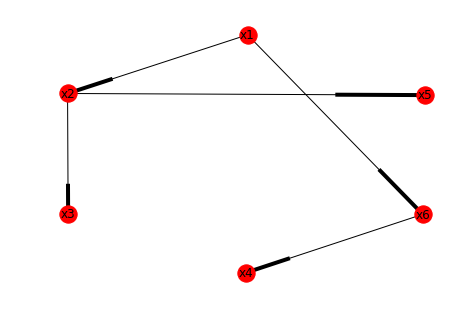

In [38]:
print ("The best model for Bayesian Network is given as the following :")
drawModel(bModel[best_model_thDS[0]])

The best model for Markov Model is given as the following :


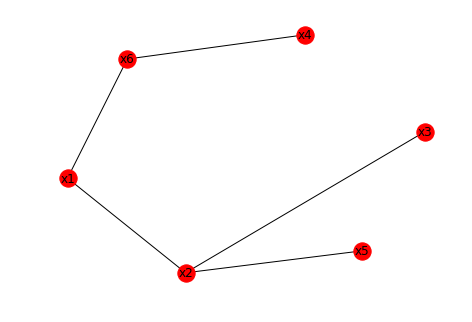

In [39]:
print ("The best model for Markov Model is given as the following :")
drawModel(marModel[best_model_thDS[0]])

# Part 3 : Markov Models

In the previous step, we have converted the models in to Markov Models. Using both Bayesian and Markov Models, we try to predict (or inference) the value of a feature assuming we know the rest of the feature values. This is accomplished by using Belief Propagation. 

Belief Propagation (sum-product) is a message passing algorithm used for performing inferences of graphical models like Bayesian and Markov Models. To find the value of the missing node, it calculates the marginal distribution for each of the unknown nodes and conditional on the observed nodes. This enables us to determine the value for the unknown node.

Below, the unknown variables are in 'variables' while the known variables and their values are stored in a dictionary as the 'evidence'. After querying for result, we get the predicted value of the 'variables'. This is executed for both the Bayesian and Markov Models for 'th' and 'and' Datasets.

In [40]:

def cal_accuracy_th(data):
    m_result = []
    data = data[cols]
    for d in data.values:
        m_result.append(belief_propagation.map_query(variables=['x3'],evidence={'x1': d[0], 'x2':d[1],  'x4': d[3], 'x5': d[4], 'x6' : d[5]})['x3'])
    label = data['x3'].values
    acc = (m_result==label).sum()/len(label)*100
    return acc

In [41]:
def cal_accuracy_and(data):
    m_result = []
    data = data[cols]
    for d in data.values:
        m_result.append(belief_propagation.map_query(variables=['f9'],evidence={'f1': d[0], 'f2':d[1], 'f3' : d[2], 'f4': d[3], 'f5': d[4], 'f6': d[5], 'f7':d[6], 'f8': d[7]})['f9'])
    label = data['f9'].values
    acc = (m_result==label).sum()/len(label)*100
    return acc

In [54]:
%%time
cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

belief_propagation = BeliefPropagation(bModel[best_model_thDS[0]])
belief_propagation.calibrate()
acc_BN_th = cal_accuracy_th(data[best_model_thDS[0]])
belief_propagation = BeliefPropagation(marModel[best_model_thDS[0]])
belief_propagation.calibrate()
acc_MM_th = cal_accuracy_th(data[best_model_thDS[0]])
print ("Predicting node x3")
print ("Accuracy Bayesian Model : " + str(acc_BN_th))
print ("Accuracy Markov Model : " + str(acc_MM_th))

/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]
/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:663: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr

Predicting node x3
Accuracy Bayesian Model : 66.7
Accuracy Markov Model : 66.7
CPU times: user 20.6 s, sys: 259 ms, total: 20.9 s
Wall time: 22.7 s


# Part 4 : Bayesian Network for 'and' Image Dataset
Here we construct the Bayesian Network for the 'and' dataset. We have the image data with 9 features each. We first find the correlations and independencies of the features by using test_conditional_independence(). Only if the significance level is higher than a threshold, we consider those conditionals as true. 

In [28]:
andDataset = pd.read_csv('AND-Features(1).csv')
from pgmpy.estimators import ConstraintBasedEstimator
est = ConstraintBasedEstimator(andDataset)
def is_independent(X, Y, Zs=[], significance_level=0.30):
    return est.test_conditional_independence(X, Y, Zs)[1] >= significance_level

In [44]:
cols = andDataset.columns.values.tolist()[2:]
andIndependent = []
for i in range(len(cols)):
    for j in range(len(cols)):
        val = is_independent(cols[i], cols[j])
        #print(str(i+1) + " and " + str(j+1) +" : " + str(val))
        if val:
            andIndependent.append([cols[i], cols[j]])  
print ("Related Features of 'and' Dataset : \n" + str(andIndependent))
print ("No. of dependencies : " + str(len(andIndependent)))

Related Features of 'and' Dataset : 
[['f1', 'f3'], ['f1', 'f4'], ['f1', 'f5'], ['f1', 'f6'], ['f2', 'f3'], ['f2', 'f5'], ['f2', 'f7'], ['f2', 'f8'], ['f3', 'f1'], ['f3', 'f2'], ['f3', 'f7'], ['f3', 'f9'], ['f4', 'f1'], ['f4', 'f7'], ['f5', 'f1'], ['f5', 'f2'], ['f6', 'f1'], ['f7', 'f2'], ['f7', 'f3'], ['f7', 'f4'], ['f8', 'f2'], ['f9', 'f3']]
No. of dependencies : 22


## Best Models
Here we use HillClimbSearch to estimate the best model for the given dataset. It performs a Heuristic Search which selects the best route out of possible routes.

We also build various other models based on the independency levels shown previously. We estimate the CPDs for the different models using Maximum Likelihood Estimator and then find the corresponding K2 Scores. 

In [45]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(andDataset.iloc[:,2:], scoring_method=K2Score(andDataset))
best_model_andDS = hc.estimate()

In [46]:
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
score = []
m = []
m.append([('f1', 'f3'), ('f2', 'f3'), ('f2', 'f8'), ('f3', 'f9'),('f4', 'f7'),('f8', 'f3'), ('f6', 'f1'), ('f5','f2')])
m.append([('f1', 'f3'), ('f2', 'f4'), ('f4', 'f5'), ('f2', 'f8'), ('f4','f7'), ('f9','f3'),('f3', 'f7'), ('f6','f1')])
m.append([('f1', 'f5'), ('f5', 'f2'), ('f2', 'f7'), ('f7', 'f3'),('f8', 'f2'),('f7','f4'), ('f6','f1'), ('f9','f3')])
m.append([('f1', 'f5'), ('f3', 'f2'), ('f8', 'f2'), ('f6', 'f1'),('f7', 'f2'), ('f7','f3'),('f3','f9'), ('f4','f7')])


for mod in m:
    model = BayesianModel(mod)
    estimator = MaximumLikelihoodEstimator(model, andDataset.iloc[:,2:])
    and_cpd = estimator.get_parameters()
    for cpd in and_cpd:
        model.add_cpds(cpd)
    score.append(K2Score(andDataset.iloc[:,2:]).score(model))

for i in range(len(score)):
    print ("Model "+str(i)+" : " + str(score[i]))
print ("\nBest Model 'and' Dataset " +  str(K2Score(andDataset.iloc[:,2:]).score(best_model_andDS)))
print("Best Model Edges : " + str(best_model_andDS.edges()))


Model 0 : -10011.432484908248
Model 1 : -9908.174011977808
Model 2 : -9930.627486874066
Model 3 : -9968.969303733815

Best Model 'and' Dataset -9462.704892371388
Best Model Edges : [('f3', 'f4'), ('f3', 'f9'), ('f3', 'f8'), ('f5', 'f9'), ('f5', 'f3'), ('f9', 'f8'), ('f9', 'f7'), ('f9', 'f1'), ('f9', 'f6'), ('f9', 'f2'), ('f9', 'f4')]


In [47]:
best_model_andDS.get_cpds()
estimator = MaximumLikelihoodEstimator(best_model_andDS, andDataset.iloc[:,2:])
and_cpd = estimator.get_parameters()
for cpd in and_cpd:
    best_model_andDS.add_cpds(cpd)
best_model_andDS.get_cpds()

[<TabularCPD representing P(f1:4 | f9:2) at 0x1a16469f60>,
 <TabularCPD representing P(f2:5 | f9:2) at 0x1a16469390>,
 <TabularCPD representing P(f3:3 | f5:4) at 0x1a16469a90>,
 <TabularCPD representing P(f4:5 | f3:3, f9:2) at 0x1a16469860>,
 <TabularCPD representing P(f5:4) at 0x1a16469400>,
 <TabularCPD representing P(f6:4 | f9:2) at 0x1a16469080>,
 <TabularCPD representing P(f7:4 | f9:2) at 0x1a16469630>,
 <TabularCPD representing P(f8:5 | f3:3, f9:2) at 0x1a1648b048>,
 <TabularCPD representing P(f9:2 | f3:3, f5:4) at 0x1a1648ba90>]

In [52]:
%%time
cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

MM_bModel_andDS = best_model_andDS.to_markov_model()

belief_propagation = BeliefPropagation(best_model_andDS)
acc_BN_and = cal_accuracy_and(andDataset.iloc[:,2:])

belief_propagation = BeliefPropagation(MM_bModel_andDS)
acc_MM_and = cal_accuracy_and(andDataset.iloc[:,2:])

print ("'and' Dataset Inferences :")
print ("Predicting node f9 :")
print ("Bayesian Model Accuracy : " + str(acc_BN_and))
print ("Markov Model Accuracy   : " + str(acc_MM_and))


/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]
/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
/Users/akash/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:663: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr

'and' Dataset Inferences :
Predicting node f9 :
Bayesian Model Accuracy : 8.089668615984404
Markov Model Accuracy   : 8.089668615984404
CPU times: user 40.5 s, sys: 451 ms, total: 40.9 s
Wall time: 43 s


BN in 'and' Dataset


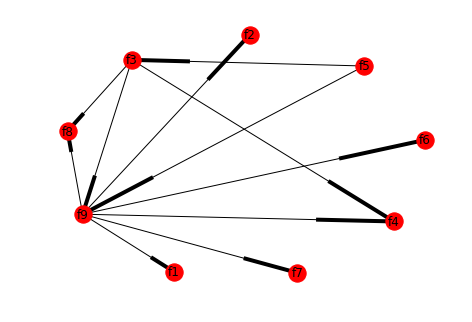

In [49]:
print ("BN in 'and' Dataset")
drawModel(best_model_andDS)

CPU times: user 30.9 ms, sys: 12.1 ms, total: 43 ms
Wall time: 42.7 ms


/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/akash/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/akash/anaconda3/lib/pytho

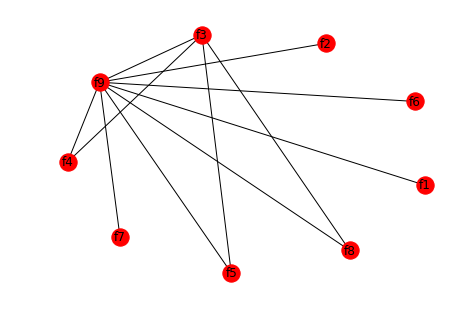

In [51]:

drawModel(MM_bModel_andDS)